<a href="https://colab.research.google.com/github/jasur-rasulov/New-York-City-Taxi-Fare-Forecasting/blob/master/2.%20Short_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Exploratory Data Analysis (EDA)***

---

#### ***Distribution of Fare Amount***

---

Text(0.5, 1.0, 'Distribution of Fare')

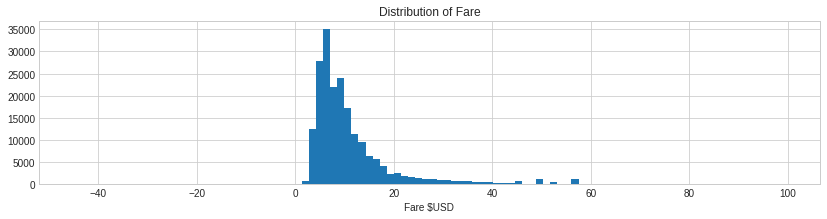

In [0]:
train[train.fare_amount<100].fare_amount.hist(bins=100, figsize=(14,3))
plt.xlabel('Fare $USD')
plt.title('Distribution of Fare')

#### ***Heatmap of Pickup and Dropoff Locations***
---

In [0]:
def plot_on_map(df, BB, nyc_map, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    axs[0].scatter(df.pickup_longitude, df.pickup_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('Pickup locations')
    axs[0].imshow(nyc_map, zorder=0, extent=BB)

    axs[1].scatter(df.dropoff_longitude, df.dropoff_latitude, zorder=1, alpha=alpha, c='r', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('Dropoff locations')
    axs[1].imshow(nyc_map, zorder=0, extent=BB)

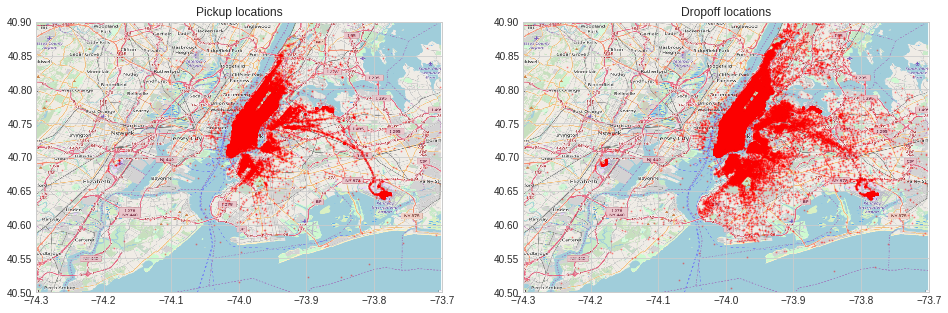

In [0]:
NY_zoom = (-74.3, -73.7, 40.5, 40.9)
nyc_map_zoom = plt.imread('https://aiblog.nl/download/nyc_-74.3_-73.7_40.5_40.9.png')
plot_on_map(train, NY_zoom, nyc_map_zoom, s=1, alpha=0.3)

### *Frequency Distributions by Hour, Week, and Month* 

In [0]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

train['distance_miles'] = distance(train.pickup_latitude, train.pickup_longitude, \
                                      train.dropoff_latitude, train.dropoff_longitude)

Text(0, 0.5, 'Frequency')

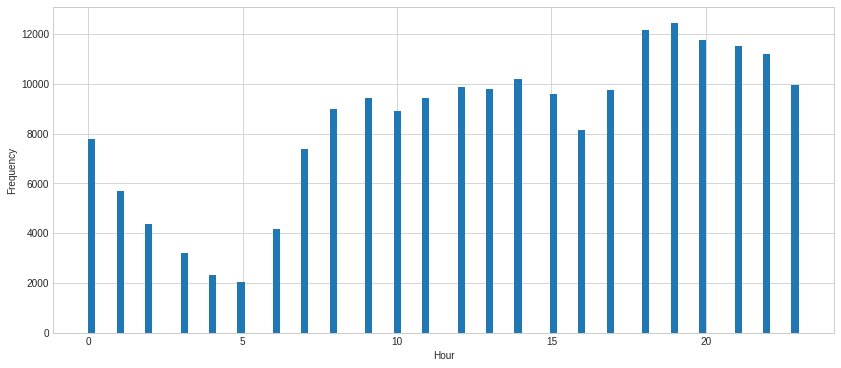

In [0]:
plt.figure(figsize=(14,6))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

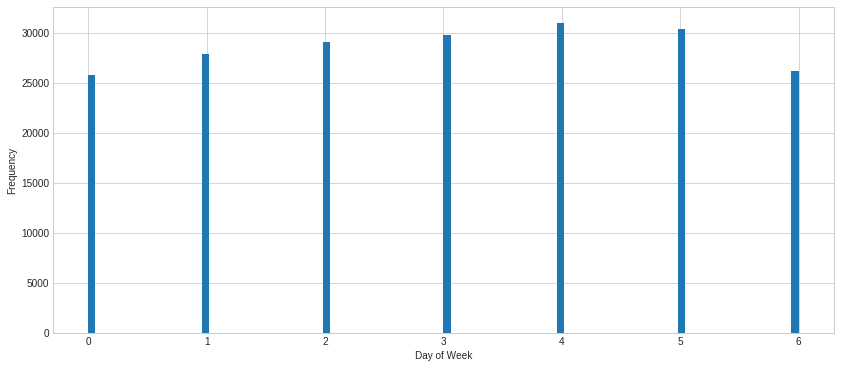

In [0]:
plt.figure(figsize=(14,6))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

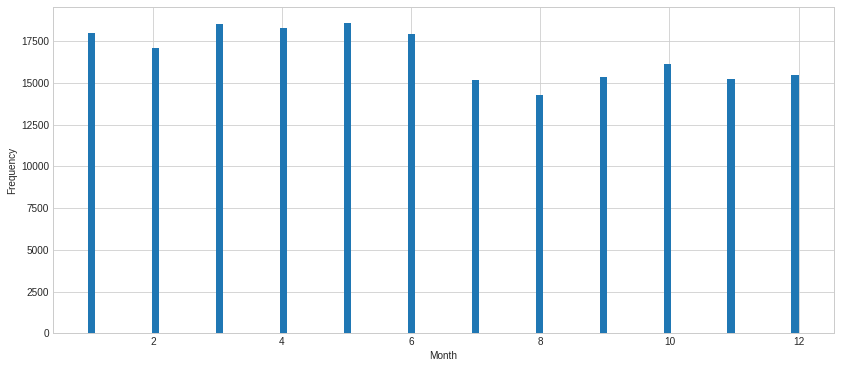

In [0]:
plt.figure(figsize=(14,6))
plt.hist(train['Month'], bins=100)
plt.xlabel('Month')
plt.ylabel('Frequency')